# Day 6: Statistical Models

## Ordinary Linear Regression

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/Okuns_law_quarterly_differences.svg/1280px-Okuns_law_quarterly_differences.svg.png" width = "400">

* Suppose the data consists of $n$ observations $\{y_i, x_i\}^n_{i=1}$.
* Each observation $i$ includes a scalar `response` $y_i$ and a column vector $x_i$ of values of $p$ `predictors` (regressors) $x_{ij}$ for $j = 1, \ldots, p$.
* In a linear regression model, the response variable, $y_{i}$, is a linear function of the regressors:

    $$ y_{i} = \beta _{1}x_{i1} + \beta _{2}x_{i2} + \cdots + \beta _{p}x_{ip} + \varepsilon _{i}, $$
    or in vector form,

    $$y_{i} = x_{i} ^ {T}\beta + \varepsilon_{i}, $$

    where $\beta$ is a $p\times 1$ vector of unknown parameters; the $\varepsilon$'s are unobserved scalar random variables (errors, `residue`) which account for influences upon the responses $y_i$ from sources other than the explanators $x_i$; and $x_{i}$ is a column vector of the $i$th observations of all the explanatory variables.

* This model can also be written in `matrix notation` as

    $$ y = X \beta + \varepsilon,$$

    where $y$ and $\varepsilon$ are $n \times 1$ vectors of the values of the response variable and the errors for the various observations, and $X$ is an $n \times p$ matrix of regressors, also sometimes called the design matrix, whose row $i$ is $x_i^T$ and contains the $i$th observations on all the explanatory variables.

* In this form, you can solve this equation by solving its `normal equation`,
  $$X^T y = X^T X \beta.$$

  * Using the normal equations to find least-squares solutions: https://www.youtube.com/watch?v=Zu-UlcfPPUk
  
<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/OLS_geometric_interpretation.svg/1280px-OLS_geometric_interpretation.svg.png" width = "300">

* We are using [statsmodels](http://www.statsmodels.org/stable/) below:
    ```bash
    pip install --upgrade --no-deps statsmodels
    ```

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.grid'] = True

### Example 1: Polynomials

In [2]:
nsample = 1000
x = np.linspace(0, 1, nsample)
X = np.column_stack((x, x ** 2))
beta = np.array([1, 0.1, 10]) # explicitly, 1 + 0.1 x + 10 x ** 2
e = np.random.normal(size = nsample)

In [3]:
X = sm.add_constant(X) # add an intercept
y_true = np.dot(X, beta)
y = y_true + e

In [4]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4535.
Date:                Wed, 26 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:45:44   Log-Likelihood:                -1422.4
No. Observations:                1000   AIC:                             2851.
Df Residuals:                     997   BIC:                             2865.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9165      0.095      9.633      0.0

* Akaike Information Criterion (AIC): https://en.wikipedia.org/wiki/Akaike_information_criterion
* Bayesian Information Criterion (BIC): https://en.wikipedia.org/wiki/Bayesian_information_criterion
    * When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in `overfitting`.
    * Both BIC and AIC attempt to resolve this problem `by introducing a penalty term for the number of parameters in the model`; the penalty term is larger in BIC than in AIC.
* Adj. R-squared statistic: coefficient of determination, the goodness of fitness; https://en.wikipedia.org/wiki/Coefficient_of_determination

In [5]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [0.91652411 0.61311795 9.56497113]
R2:  0.9009698848995132


In [6]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

prstd = wls_prediction_std(results) # the latters are lower/upper confidence bounds

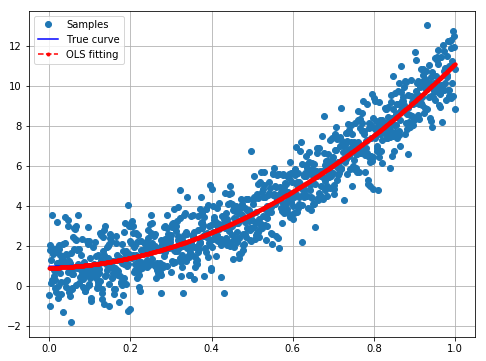

In [7]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(x, y, 'o', label = "Samples")
ax.plot(x, y_true, 'b-', label = "True curve")
ax.plot(x, results.fittedvalues, 'r--.', label = "OLS fitting")
ax.legend(loc = 'best')

(array([  7.,  18.,  83., 160., 240., 243., 174.,  49.,  22.,   4.]),
 array([-3.23443588, -2.58025151, -1.92606714, -1.27188277, -0.61769841,
         0.03648596,  0.69067033,  1.3448547 ,  1.99903907,  2.65322344,
         3.30740781]),
 <a list of 10 Patch objects>)

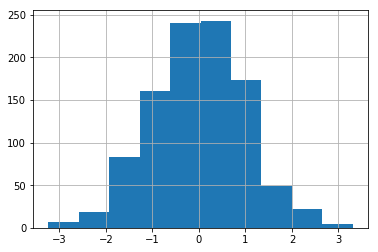

In [8]:
residues = results.fittedvalues - y

plt.figure()
plt.hist(residues)

In [9]:
import scipy

print(scipy.stats.kstest(residues, 'norm')) 

KstestResult(statistic=0.02150255465353529, pvalue=0.7442678686700691)


### Example 2: Nonlinear Equation

In [10]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size = nsample)

In [11]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     173.8
Date:                Wed, 26 Jun 2019   Prob (F-statistic):           4.23e-25
Time:                        16:45:44   Log-Likelihood:                -37.795
No. Observations:                  50   AIC:                             83.59
Df Residuals:                      46   BIC:                             91.24
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4729      0.028     16.745      0.0

In [12]:
print('Parameters: ', res.params)

Parameters:  [ 0.47287905  0.54948296 -0.01914638  5.33923913]


In [13]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

prstd, iv_l, iv_u = wls_prediction_std(res) # the latters are lower/upper confidence bounds

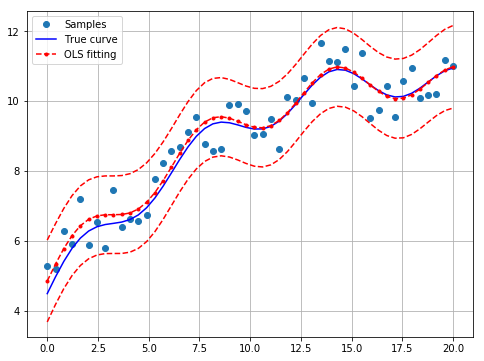

In [14]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(x, y, 'o', label = "Samples")
ax.plot(x, y_true, 'b-', label = "True curve")
ax.plot(x, res.fittedvalues, 'r--.', label = "OLS fitting")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc = 'best')

### Application: Capital Asset Pricing Model (CAPM)
* Treynor (1961), Sharpe (1964), Lintner (1965), Mossin (1966).
    * Sharpe shares Nobel Memorial Prize in Economic Sciences with Markowitz (1990).
<img src = "https://cdn-images-1.medium.com/max/800/1*jh7T0OZTOjXKciaUALG3gA.png" width = "300">
* The CAPM is given by

    $$ \mathbb{E}[R_i] = R_f + \beta_i (\mathbb{E}[R_m] - R_f), $$
    
    where $R_i$ is the random variable representing the return rate of asset $i$, $R_f$ is the risk-free interest rate, $R_m$ is the return rate of the market index, and $\beta_i$ is the slope (sensitivity) of the expected excess asset returns to the expected excess market returns.
    * CAPM attempts to prices securities by examining the relationship that exists between expected returns and risk.
    * The model implies that investors always combine two types of assets or securities; a `risk-free asset` and a `risky asset` in the form of a market portfolio of various assets.
    * CAPM further posits that investors expect to be rewarded for holding these risky assets according to the risk inherited for holding on to such assets.
    * After all, such kind of risk cannot be diversified (market-related usually referred to as systematic risk) and as a result, investors need to be compensated for taking on such "undiversifiable" risks. 
    
* References:
    * [CAPM](http://www.tej.com.tw/twsite/tejweb/tw/product/explain/A0302.htm) by TEJ.
    * [十分鐘讀懂投資理財學 - 投資基金一天到晚聽到的阿爾法、貝塔係數和夏普值到底是什麼意思？](https://kopu.chat/2017/05/29/%e5%8d%81%e5%88%86%e9%90%98%e8%ae%80%e6%87%82%e6%8a%95%e8%b3%87%e7%90%86%e8%b2%a1%e5%ad%b8-%e6%8a%95%e8%b3%87%e5%9f%ba%e9%87%91%e4%b8%80%e5%a4%a9%e5%88%b0%e6%99%9a%e8%81%bd%e5%88%b0%e7%9a%84/)
    * [CAPM Analysis: Calculating stock Beta as a Regression with Python](https://medium.com/python-data/capm-analysis-calculating-stock-beta-as-a-regression-in-python-c82d189db536)
    * https://github.com/jeromeku/Python-Financial-Tools/blob/master/capm.py
    * Two coursera videos: https://www.coursera.org/lecture/principles-of-corporate-finance/4-6-capital-asset-pricing-model-capm-examples-kaiqB, https://zh-tw.coursera.org/lecture/investments-fundamentals/capm-example-1-coca-cola-JsBHf
* Data set: https://www.csie.ntu.edu.tw/~d00922011/python/data/capm_data.zip

In [15]:
import pandas as pd
import statsmodels.api as sm

fb = pd.read_csv('./capm_data/FB.csv', parse_dates = True, index_col = 'Date')
sp_500 = pd.read_csv('./capm_data/^GSPC.csv', parse_dates = True, index_col = 'Date')

In [16]:
# joining the closing prices of the two datasets 
monthly_prices = pd.concat([fb['Close'], sp_500['Close']], axis = 1)
monthly_prices.columns = ['Facebook', 'S&P500 Index']

In [17]:
# check the head of the dataframe
print(monthly_prices.head())
print(monthly_prices.tail())

             Facebook  S&P500 Index
Date                               
2014-11-01  77.699997   2067.560059
2014-12-01  78.019997   2058.899902
2015-01-01  75.910004   1994.989990
2015-02-01  78.970001   2104.500000
2015-03-01  82.220001   2067.889893
              Facebook  S&P500 Index
Date                                
2017-07-01  169.250000   2470.300049
2017-08-01  171.970001   2471.649902
2017-09-01  170.869995   2519.360107
2017-10-01  180.059998   2575.260010
2017-11-01  177.179993   2647.580078


In [18]:
# calculate monthly returns
monthly_returns = monthly_prices.pct_change(1)
clean_monthly_returns = monthly_returns.dropna(axis = 0)  # drop first missing row
print(clean_monthly_returns.head())

            Facebook  S&P500 Index
Date                              
2014-12-01  0.004118     -0.004189
2015-01-01 -0.027044     -0.031041
2015-02-01  0.040311      0.054893
2015-03-01  0.041155     -0.017396
2015-04-01 -0.041961      0.008521


In [19]:
# split dependent and independent variable
X = clean_monthly_returns['S&P500 Index'] - (1.02 ** (1 / 12) - 1)
y = clean_monthly_returns['Facebook'] - (1.02 ** (1 / 12) - 1)

In [20]:
# Add a constant to the independent value
X1 = sm.add_constant(X)

In [21]:
# make regression model 
model = sm.OLS(y, X1)

In [22]:
# fit model and print results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Facebook   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     3.816
Date:                Wed, 26 Jun 2019   Prob (F-statistic):             0.0590
Time:                        16:45:45   Log-Likelihood:                 57.383
No. Observations:                  36   AIC:                            -110.8
Df Residuals:                      34   BIC:                            -107.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0196      0.009      2.278   

* https://finance.yahoo.com/quote/FB/key-statistics?p=FB

### Application: Fama-French 3-Factor Model
* `Eugene Fama` and `Kenneth French` (1993): https://www.sciencedirect.com/science/article/pii/0304405X93900235
    * As known, the CAPM uses only one variable to describe the returns of a portfolio or stock with the returns of the market as a whole.
    * Fama and French use three variables:
        $$R_p - R_f \sim \beta (R_m - R_f) + b_s \mbox{SMB} + b_v \mbox{HML} + \alpha,$$
        
      where SMB refers to Small Minus Big (market cap.), and HML refers to High Minus Low (book-to-market ratio).
    * In 2013, Fama shared the Nobel Memorial Prize in Economic Sciences. (See https://www.nobelprize.org/prizes/economic-sciences/2013/fama/facts/.)
* 投資思維－主動投資或被動投資？ (The Limit of Theory)
    * https://justininvesting.wordpress.com/2018/04/19/the-limits-of-theory/
    * https://justininvesting.wordpress.com/2018/04/24/the-limits-of-theory-2/
* Foye (2017) tested the five-factor model and in the UK and raises some serious concerns.
* Data set: https://www.csie.ntu.edu.tw/~d00922011/python/data/ff3_data.zip
* Kenneth R. French's data library; https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime
import statsmodels.api as sm
import tqdm

raw = pd.read_csv("./ff3_data/monthly_data.csv")
df = raw.groupby('Date')
df.head()

Code    Date        r     MV    PB
0     1316  201601   1.5463   1673  1.36
1     1701  201601  -2.2788   5752  1.06
2     1707  201601  -0.8197  23649  7.45
3     1708  201601  -2.1809   5737  1.13
4     1709  201601  -2.9900   6277  0.97
54    1316  201602   0.3045   1678  1.36
55    1701  201602   3.8862   5976  1.10
56    1707  201602   3.0300  24366  7.68
57    1708  201602  -0.4778   5709  1.12
58    1709  201602   9.9316   6901  1.06
108   1316  201603   6.7814   1792  1.46
109   1701  201603  -3.4913   5767  1.06
110   1707  201603  -1.3368  24046  7.57
111   1708  201603  -5.1202   5417  1.06
112   1709  201603   3.4267   7179  1.10
162   1316  201604  -0.9480   1775  1.44
163   1701  201604  -3.3593   5574  1.03
164   1707  201604   5.4201  25361  7.99
165   1708  201604  -3.8787   5207  1.02
166   1709  201604  -5.4216   6817  1.05
216   1316  201605   8.1341   1919  1.56
217   1701  201605   0.5345   5603  1.03
218   1707  201605   5.9127  26861  8.46
219   1708  201605  -3.1578   5043  0.99
220   1709  201605   1.9106   6947  1.07
270   1316  201606  -0.8848   1902  1.62
271   1701  201606  -2.3935   5469  0.99
272   1707  201606   1.6990  27317  7.26
273   1708  201606  -1.0871   4988  1.01
274   1709  201606   9.3751   7606  1.13
...    ...     ...      ...    ...   ...
1836  1316  201811  -9.4691   2310  1.38
1837  1701  201811   1.3661   5529  0.98
1838  1707  201811   1.0255  26848  5.45
1839  1708  201811   7.9400   5066  0.90
1840  1709  201811  -1.8183   8052  1.14
1890  1316  201812  -6.2016   2166  1.36
1891  1701  201812  -2.4257   5395  0.96
1892  1707  201812  -3.2995  25962  4.89
1893  1708  201812   0.7952   5106  0.89
1894  1709  201812  -8.6420   7390  1.03
1944  1316  201901   1.2396   2193  1.37
1945  1701  201901   1.9337   5499  0.98
1946  1707  201901   8.6614  28211  5.31
1947  1708  201901   2.7614   5247  0.92
1948  1709  201901   2.0272   7540  1.06
1998  1316  201902   9.3879   2399  1.50
1999  1701  201902   2.4390   5633  1.00
2000  1707  201902  -1.6907  27734  5.22
2001  1708  201902  -0.9596   5197  0.91
2002  1709  201902   1.9868   7732  1.08
2052  1316  201903  24.6269   2996  1.87
2053  1701  201903   0.0000   5633  1.00
2054  1707  201903  -2.2114  27120  5.11
2055  1708  201903  -0.1938   5187  0.91
2056  1709  201903  -7.4674   7155  1.00
2106  1316  201904  -4.1915   2871  1.80
2107  1701  201904  -0.2644   5618  1.00
2108  1707  201904   7.7892  29233  5.50
2109  1708  201904   1.3592   5257  0.92
2110  1709  201904  -1.7543   7029  0.99

[200 rows x 5 columns]

In [24]:
def cal_smb_hml(df):
    
    import warnings
    warnings.filterwarnings('ignore')
    
    # categorized into two groups: B(ig) and S(mall)
    median_mv = df['MV'].median()
    df['SB'] = df['MV'].apply(lambda x: 'B' if x >= median_mv else 'S')

    # BM: book-to-market ratio; PB: price-to-book ratio (股價淨值比)
    df['BM'] = 1 / df['PB']
    # categorized into three groups: H, M, L
    border_down, border_up = df['BM'].quantile([0.3, 0.7])
    df['HML'] = df['BM'].apply(lambda x: 'H' if x >= border_up else 'M')
    df['HML'] = df.apply(lambda row: 'L' if row['BM'] <= border_down else row['HML'], axis = 1)

    # categorized into 6 groups
    df_SL = df.query('(SB=="S") & (HML=="L")')
    df_SM = df.query('(SB=="S") & (HML=="M")')
    df_SH = df.query('(SB=="S") & (HML=="H")')
    df_BL = df.query('(SB=="B") & (HML=="L")')
    df_BM = df.query('(SB=="B") & (HML=="M")')
    df_BH = df.query('(SB=="B") & (HML=="H")')

    # return rate for each group
    R_SL = (df_SL['r'] * df_SL['MV']).sum() / df_SL['MV'].sum() / 100
    R_SM = (df_SM['r'] * df_SM['MV']).sum() / df_SM['MV'].sum() / 100
    R_SH = (df_SH['r'] * df_SH['MV']).sum() / df_SH['MV'].sum() / 100
    R_BL = (df_BL['r'] * df_BL['MV']).sum() / df_BL['MV'].sum() / 100
    R_BM = (df_BM['r'] * df_BM['MV']).sum() / df_BM['MV'].sum() / 100
    R_BH = (df_BH['r'] * df_BH['MV']).sum() / df_BH['MV'].sum() / 100

    # then we calculate SMB and HML
    smb = (R_SL + R_SM + R_SH - R_BL - R_BM - R_BH) / 3
    hml = (R_SH + R_BH - R_SL - R_BL) / 2
    return smb, hml

In [25]:
factors = []
for date, group in tqdm.tqdm(df):
    smb, hml = cal_smb_hml(group)
    factors.append([date, smb, hml])
    
df_factor = pd.DataFrame(factors, columns = ['Date', 'SMB', 'HML'])

100%|██████████| 40/40 [00:09<00:00,  4.45it/s]


In [26]:
# loading return rates for four stocks
df_Ri = pd.read_csv("./ff3_data/monthly_Ri.csv") 
df_Ri.head()

1707    1730    1734    3705
0 -0.8197 -1.3988 -1.5763 -0.7254
1  3.0300  4.3191  1.4234  2.2966
2 -1.3368  0.1373  2.9823  2.4488
3  5.4201  3.4200 -5.2812 -4.1833
4  5.9127 -2.3809 -0.1798 -1.4554

In [27]:
# loading return rates of the market
df_Rm = pd.read_csv("./ff3_data/monthly_Rm.csv")
df_Rm.head()

Rm
0 -2.2453
1  2.8586
2  0.5461
3 -4.8201
4  1.5080

In [28]:
# risk-free rate
Rf = 1.0104 ** (1 / 12) - 1 
print(Rf)

0.0008625627980207717


In [29]:
# return rates minus risk-free return rate
df_RimRf = df_Ri - Rf * 100
df_RmmRf = df_Rm - Rf * 100

In [30]:
df2 = pd.merge(df_factor, df_RmmRf, left_index = True, right_index = True, how = 'inner')
df3 = pd.merge(df2, df_RimRf, left_index = True, right_index = True, how = 'inner')
df3.head()

Date       SMB       HML        Rm      1707      1730      1734  \
0  201601 -0.013187  0.016115 -2.331556 -0.905956 -1.485056 -1.662556   
1  201602 -0.019467  0.024062  2.772344  2.943744  4.232844  1.337144   
2  201603  0.041950 -0.019357  0.459844 -1.423056  0.051044  2.896044   
3  201604  0.008583  0.040254 -4.906356  5.333844  3.333744 -5.367456   
4  201605  0.031335 -0.085267  1.421744  5.826444 -2.467156 -0.266056   

       3705  
0 -0.811656  
1  2.210344  
2  2.362544  
3 -4.269556  
4 -1.541656

In [31]:
stock_names = {
    '1707': '葡萄王',
    '1730': '花仙子',
    '1734': '杏輝',
    '3705': '永信'
}

for stock in ['1707', '1730', '1734', '3705']:
    model = sm.OLS(df3[stock],
                   sm.add_constant(df3[['Rm', 'SMB', 'HML']].values)
                  )
    result = model.fit()
    print("-" * 30, stock_names[stock], "-" * 30)
    print(result.summary())
    print()

------------------------------ 葡萄王 ------------------------------
                            OLS Regression Results                            
Dep. Variable:                   1707   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     3.583
Date:                Wed, 26 Jun 2019   Prob (F-statistic):             0.0230
Time:                        16:45:54   Log-Likelihood:                -130.55
No. Observations:                  40   AIC:                             269.1
Df Residuals:                      36   BIC:                             275.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.



#### Exercise: Fama-French 5-Factor Model
* Reference: https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_5_factors_2x3.html

#### Exercise: Buffett's Alpha
* Reference: https://www.aqr.com/Insights/Research/Journal-Article/Buffetts-Alpha

#### Exercise: Smart Beta
* Reference: Smart beta portfolio optimization: https://file.scirp.org/pdf/JMF_2015052615053472.pdf

#### Exercise: Black-Litterman Model
* Reference: Global portfolio optimization: http://www.sef.hku.hk/tpg/econ6017/2011/black-litterman-1992.pdf

## Autoregressive Moving-Average (ARMA) Model 
* We introduce the construction of ARMA model by following [Building ARMA models: Examples](http://www.phdeconomics.sssup.it/documents/Lesson15.pdf).
    * I recommand that you could read the slides from Lession1.pdf to Lession19.pdf.
    * Also read my notes on Financial Data Analysis held by Prof. Miao, NTUST: https://hackmd.io/@arthurzllu/BkJJlHBoE
* Reference:
    * Tutorial of time series: https://kevinkotze.github.io/ts-1-tut/ (change the middle number from 1 to 10 for all tutorials)
    * [Time Series Analysis in Python: Linear Models to GARCH Models](http://www.blackarbs.com/blog/time-series-analysis-in-python-linear-models-to-garch/11/1/2016) (利用python进行时间序列分析-从随机游走到GARCH模型: <a href = "https://zhuanlan.zhihu.com/p/35409323">1</a>, <a href = "https://zhuanlan.zhihu.com/p/35414753">2</a>, <a href = "https://zhuanlan.zhihu.com/p/35417133">3</a>)
    * Another package for time series analysis: [pyflux](https://pyflux.readthedocs.io/en/latest/)
<img src = "https://pic2.zhimg.com/80/v2-f63f3e52f0f793a02d60e6d9757d3d5d_hd.jpg" width = 800></img>

### Example 1: CPI Inflation
* Data set: https://www.csie.ntu.edu.tw/~d00922011/python/data/cpi.csv

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cpi.csv")
df.Date = pd.to_datetime(df.Date)
df = df.set_index("Date")
df.tail(10)

CPI  Inflation
Date                          
2013-04-01  232.531      -0.10
2013-05-01  232.945       0.18
2013-06-01  233.504       0.24
2013-07-01  233.596       0.04
2013-08-01  233.877       0.12
2013-09-01  234.149       0.12
2013-10-01  233.546      -0.26
2013-11-01  233.069      -0.20
2013-12-01  233.049      -0.01
2014-01-01  233.916       0.37

Text(0,0.5,'CPI inflation (%)')

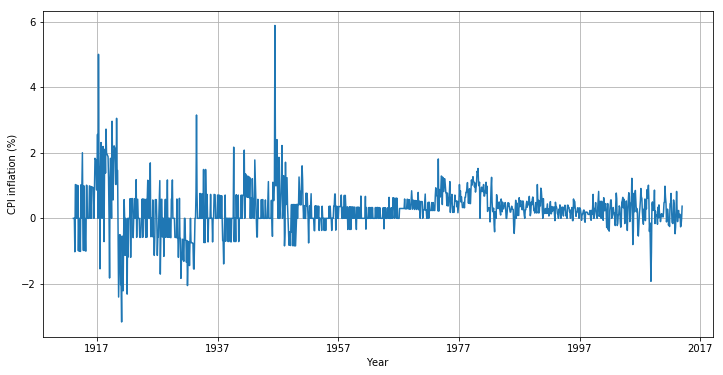

In [33]:
plt.figure(figsize = (12, 6))
plt.plot(df["Inflation"])
plt.xlabel("Year")
plt.ylabel("CPI inflation (%)")

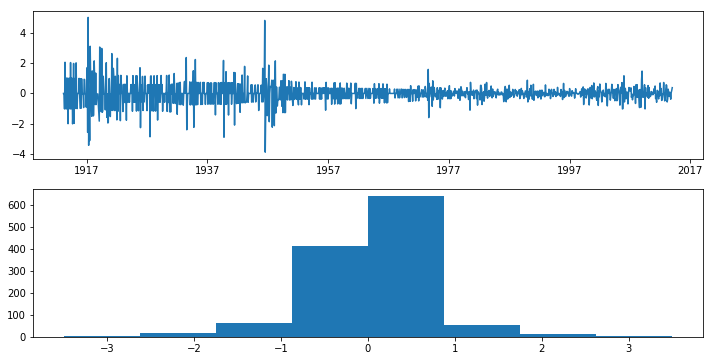

In [34]:
x = df.Inflation.diff().dropna()

plt.figure(figsize = (12, 6))
plt.subplot(211)
plt.plot(x)
plt.grid()
plt.subplot(212)
plt.hist(x, bins = np.linspace(-3, 4, 9) - 0.5)
plt.grid()

#### Unit root test
* We are using [augmented Dickey-Fuller unit root test](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html) to check if there is a unit root:
    * $H_0$ ([the null hypothesis](https://en.wikipedia.org/wiki/Null_hypothesis)): there is a unit root.
    * $H_a$ ([the alternative hypothesis](https://en.wikipedia.org/wiki/Alternative_hypothesis)): there is no unit root.
* See [單根與隨機趨勢](http://homepage.ntu.edu.tw/~sschen/Book/Slides/Ch6Unitroot.pdf) by Prof. 陳旭昇.
    * I strongly recommend Prof. Chen's book, *Applied Time-Series Econometrics for Macroeconomics and Finance*, to you: http://homepage.ntu.edu.tw/~sschen/Book/Book2.htm.

In [35]:
print(sm.tsa.stattools.adfuller(x)) # return values: test statistic, p-value, ...

(-9.471693738865671, 4.089976072020427e-16, 23, 1187, {'1%': -3.4358710597388042, '5%': -2.863977991064458, '10%': -2.5680680340944337}, 1960.4737394619895)


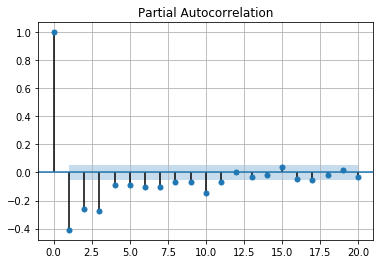

<Figure size 864x432 with 0 Axes>

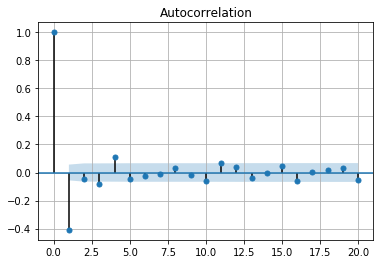

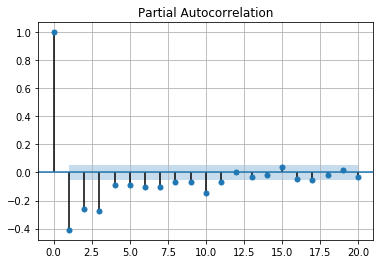

In [36]:
plt.figure(figsize = (12, 6))
sm.graphics.tsa.plot_acf(x, lags = 20)
sm.graphics.tsa.plot_pacf(x, lags = 20)

In [37]:
model = sm.tsa.ARMA(x, (0, 1)).fit(disp = False)
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:              Inflation   No. Observations:                 1211
Model:                     ARMA(0, 1)   Log Likelihood               -1041.831
Method:                       css-mle   S.D. of innovations              0.572
Date:                Wed, 26 Jun 2019   AIC                           2089.662
Time:                        16:45:56   BIC                           2104.960
Sample:                    03-01-1913   HQIC                          2095.422
                         - 01-01-2014                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.693e-07      0.004   7.06e-05      1.000      -0.007       0.007
ma.L1.Inflation    -0.7686      0.024    -32.485      0.000      -0.815      -0.722
                                

<Figure size 864x432 with 0 Axes>

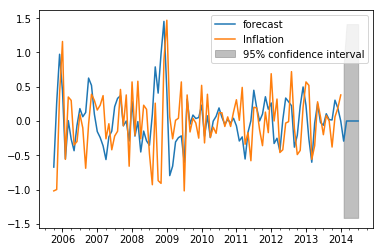

In [38]:
plt.figure(figsize = (12, 6))
model.plot_predict(x.shape[0] - 100, x.shape[0] + 5)
plt.grid()

### Example 2: Trends and Cycles in Unemployment
* See [Trends and cycles in unemployment](https://www.statsmodels.org/devel/examples/notebooks/generated/statespace_cycles.html) with [Time-series filters](https://www.statsmodels.org/devel/examples/notebooks/generated/tsa_filters.html).

## Generalized Autoregressive Conditional Heteroskedasticity (GARCH) Model
* Autoregressive conditional heteroskedasticity (ARCH) model is proposed by **Engle** and **Granger** in 1982.
    * Engle and Granger won the Nobel prize in 2003.
* GARCH model is proposed by Bollerslev(1986).
* GARCH(1, 1) model is given by
    \begin{eqnarray}
       r_t    & = & \mu + \epsilon_t, \\
       \epsilon_t & = & \sigma_t e_t, \\
       \sigma^2_t & = & \omega + \alpha \epsilon_{t-1}^2 + \beta \sigma^2_{t-1},
    \end{eqnarray}
    where $\omega + \alpha + \beta = 1.$
* We use the package `arch`: https://pypi.org/project/arch/
    ```bash
        pip install arch
    ```
* References:
    * https://zhuanlan.zhihu.com/p/35394039
    * https://barnesanalytics.com/garch-models-in-python

## Vector Autoregression (VAR)
* See https://www.statsmodels.org/dev/vector_ar.html.

## Cointegrated VAR
* Tutorial on CVAR: https://www.csie.ntu.edu.tw/~d00922011/python/312/ctbc_20190621.pdf
* We need the package `patsy` in the following topic.
    ```bash
        pip install patsy
    ```
* References:
    * https://www.economics.utoronto.ca/mburda/teaching/IES/3.%20Cointegration,%20VAR,%20VEC.pdf
    * https://www.empiwifo.uni-freiburg.de/lehre-teaching-1/summer-term-13/Material%20Time%20Series%20Analysis/var13.pdf

In [39]:
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.tsa.stattools import coint

np.random.seed(107)

import matplotlib
import matplotlib.pyplot as plt

### Example: Correlated Processes

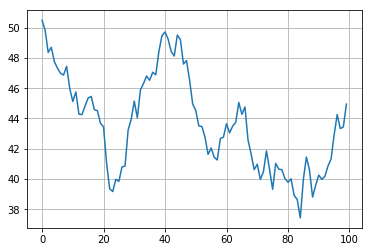

In [40]:
X_returns = np.random.normal(0, 1, 100) # generate the daily returns
X = pd.Series(np.cumsum(X_returns), name = 'X') + 50
X.plot()

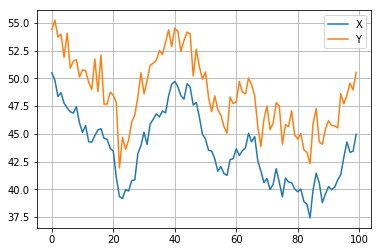

In [41]:
some_noise = np.random.normal(0, 1, 100)
Y = X + 5 + some_noise
Y.name = 'Y'
pd.concat([X, Y], axis = 1).plot()

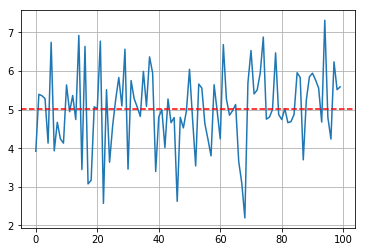

In [42]:
(Y - X).plot() # plot the spread
plt.axhline((Y - X).mean(), color = 'red', linestyle = '--')

In [43]:
score, pvalue, _ = coint(X, Y)
print(pvalue)

2.050341865341356e-16


In [44]:
X.corr(Y)

0.9497090646385927

### Example: iid Processes

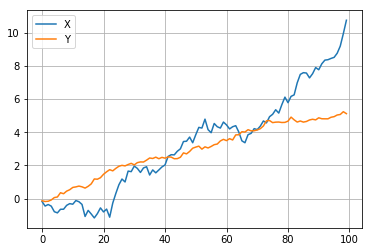

In [45]:
X_returns = np.random.normal(0.1, 0.3, 100)
Y_returns = np.random.normal(0.05, 0.1, 100)

X_diverging = pd.Series(np.cumsum(X_returns), name = 'X')
Y_diverging = pd.Series(np.cumsum(Y_returns), name = 'Y')

pd.concat([X_diverging, Y_diverging], axis = 1).plot()

In [46]:
print('Correlation: ', str(X_diverging.corr(Y_diverging)))
score, pvalue, _ = coint(X_diverging, Y_diverging)
print('Cointegration test p-value: ', str(pvalue))

Correlation:  0.9324260888263758
Cointegration test p-value:  0.9313098517121117


### Example: No Correlation

In [47]:
Y2 = pd.Series(np.random.normal(0, 1, 1000), name = 'Y2') + 20
Y3 = Y2.copy()

In [48]:
# Y2 = Y2 + 10
Y3[0:100] = 30
Y3[100:200] = 10
Y3[200:300] = 30
Y3[300:400] = 10
Y3[400:500] = 30
Y3[500:600] = 10
Y3[600:700] = 30
Y3[700:800] = 10
Y3[800:900] = 30
Y3[900:1000] = 10

(0, 40)

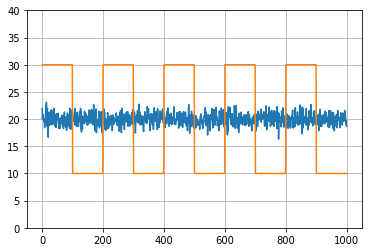

In [49]:
Y2.plot()
Y3.plot()
plt.ylim([0, 40])

In [50]:
print('Correlation: ', str(Y2.corr(Y3)))
score, pvalue, _ = coint(Y2, Y3)
print('Cointegration test p-value: ', str(pvalue))

Correlation:  -0.04130406958091663
Cointegration test p-value:  0.0


### Example: Real Data
* Reference:
    * https://www.quantopian.com/posts/cointegration-test-dont-match-with-lectures-example
    * https://www.pythonforfinance.net/2018/03/15/trading-strategy-analysis-using-python-and-the-ffn-package-part-2/
    * https://www.bauer.uh.edu/rsusmel/phd/ec2-7.pdf
    * http://statmath.wu.ac.at/~hauser/LVs/FinEtricsQF/FEtrics_Chp4.pdf

In [51]:
import ffn

symbol_list = ['nflx', 'msft', 'goog', 'amzn', 'intl']
securities_panel = ffn.get(symbol_list, start = '2019-01-01')
stat = securities_panel.calc_stats()
stat.display()

Stat                 nflx        msft        goog        amzn        intl
-------------------  ----------  ----------  ----------  ----------  ----------
Start                2018-12-31  2018-12-31  2018-12-31  2018-12-31  2018-12-31
End                  2019-06-25  2019-06-25  2019-06-25  2019-06-25  2019-06-25
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         34.61%      32.42%      4.90%       25.05%      -0.11%
Daily Sharpe         1.92        2.75        0.52        1.86        0.14
Daily Sortino        4.05        4.93        0.77        3.16        0.25
CAGR                 85.30%      79.09%      10.44%      59.04%      -0.23%
Max Drawdown         -12.57%     -7.90%      -19.52%     -13.75%     -22.25%
Calmar Ratio         6.79        10.01       0.53        4.29        -0.01

MTD                  4.96%       7.88%       -1.57%      5.81%       5.12%
3m                   -1.62%      13.82%      -8.94%      5.86%       -7.05%
6m    

In [52]:
return_rates = securities_panel.pct_change().dropna()
return_rates.head()

nflx      msft      goog      amzn      intl
Date                                                        
2019-01-02  0.000000 -0.004430  0.009888  0.024741  0.006014
2019-01-03  0.013226 -0.036788 -0.028484 -0.025242 -0.029076
2019-01-04  0.097234  0.046509  0.053786  0.050064  0.051497
2019-01-07  0.059717  0.001275 -0.002167  0.034353  0.002129
2019-01-08  0.015634  0.007251  0.007385  0.016612 -0.014343

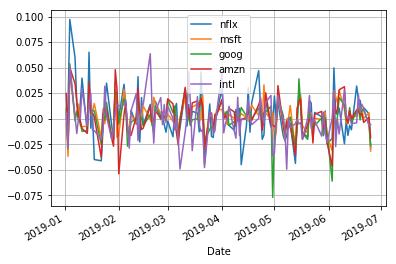

In [53]:
return_rates.plot()

In [54]:
def find_cointegrated_pairs(securities_panel):
    
    rows, cols = securities_panel.shape
    n = cols
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = securities_panel.keys
    pairs = []
    
    for i in range(n):
        
        for j in range(i + 1, n):
            
            S1 = securities_panel.values[:, i]
            S2 = securities_panel.values[:, j]
            
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            
            if pvalue < 0.05:
                pairs.append((i, j))
                
    return score_matrix, pvalue_matrix, pairs

In [55]:
scores, pvalues, pairs = find_cointegrated_pairs(securities_panel)
print(pvalues)
print(pairs)

[[1.         0.00137397 0.00146145 0.00617578 0.10382539]
 [1.         1.         0.97327342 0.87330301 0.68055855]
 [1.         1.         1.         0.8757571  0.47137914]
 [1.         1.         1.         1.         0.23359156]
 [1.         1.         1.         1.         1.        ]]
[(0, 1), (0, 2), (0, 3)]


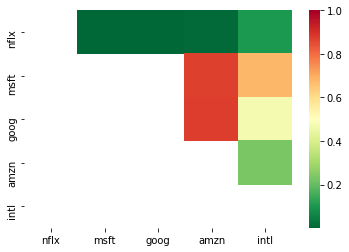

In [56]:
import seaborn
seaborn.heatmap(pvalues, xticklabels = symbol_list, yticklabels = symbol_list,
                cmap = 'RdYlGn_r', mask = (pvalues >= 0.95))

In [57]:
a1 = symbol_list[pairs[0][0]]
a2 = symbol_list[pairs[0][1]]

S1 = securities_panel[a1]
S2 = securities_panel[a2]

In [58]:
score, pvalue, _ = coint(S1, S2)
pvalue

0.001373970548884321

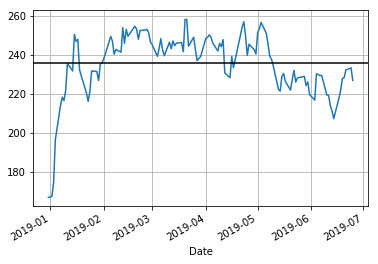

In [59]:
delta = S1 - S2
delta.plot()
plt.axhline(delta.mean(), color = 'black')

In [60]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

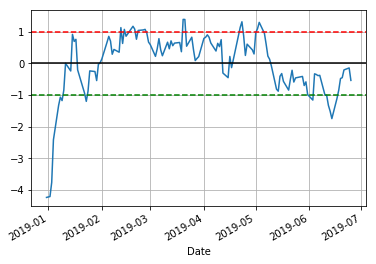

In [61]:
zscore(delta).plot()

plt.axhline(zscore(delta).mean(), color = 'black')
plt.axhline(1.0, color = 'red', linestyle = '--')
plt.axhline(-1.0, color = 'green', linestyle = '--')

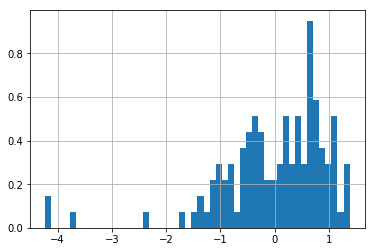

In [62]:
zscore(delta).hist(bins = 50, density = True)

In [63]:
import scipy

scipy.stats.jarque_bera(delta) # not a noraml distribution

(172.39368838310858, 0.0)